## Trabajo tarea Cristian Leon

# Phyton

Espero que sea la correcta


In [16]:
# importacion de librerias
import numpy as np
import pandas as pd

# Ejercicio 1
Debe cargar el carchivo en un DataFrame, desplegando la cantidad de registros (filas) y la cantidad de características presentes en la base de datos, debe eliminar del DataFrame las siguientes columnas: **id, fecha_inicio, fecha_ultima_accion, ppei1, ppei2, ppei3 y ppei4**, para aquellas columnas cuyos nombres vengan con espacion en blanco al comienzo, debe quitar esos espacios y se requiere eliminar de los valores almacenados en la columna **gen** el carácter punto con el cual vienen algunos géneros

In [17]:
#carga datos
df = pd.read_excel("consolidado_sernac.xlsx")
df = df[df['gen'] != '.']
num_filas, num_columnas = df.shape
print(f' cantidad de filas {num_filas} y de columnas {num_columnas}')


 cantidad de filas 5143 y de columnas 27


Eliminacion de columnas solicitadas

In [18]:
df = df.drop('id',axis = 1)
df = df.drop('fecha_inicio',axis = 1)
df = df.drop('fecha_ultima_accion',axis = 1)
df = df.drop('ppei1',axis = 1)
df = df.drop('ppei2',axis = 1)
df = df.drop('ppei3',axis = 1)
df = df.drop('ppei4',axis = 1)

num_filas, num_columnas = df.shape
print(f' canlidad de filas {num_filas} y de columnas {num_columnas}')

 canlidad de filas 5143 y de columnas 20


No se visualizan nombres de columnas con espacion blancos al inicio.
De igual forma lo siguiente quita los blancos a la derecha e izquierda

In [19]:
df.columns

Index(['pex', 'p1a', 'p1b', 'pinst', 'p2', 'p3', 'p4a', 'p4b', 'p4c', 'nps',
       'pgen', 'gen', 'region', 'educ', 'edad', 'ocup', 'ingreso', 'sitdisc',
       'indg', 'mes'],
      dtype='object')

In [20]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.columns

Index(['pex', 'p1a', 'p1b', 'pinst', 'p2', 'p3', 'p4a', 'p4b', 'p4c', 'nps',
       'pgen', 'gen', 'region', 'educ', 'edad', 'ocup', 'ingreso', 'sitdisc',
       'indg', 'mes'],
      dtype='object')

# Ejercicio 2
Implemente una función de Python que reciba por parámetro un DataFrame y el género, para este último los valores posibles son: Masculino, Femenino, No binario, Otro y Todos. esta función debe devolver el NPS para el género solicitado, si es Todos devolvera el NPS considerando todos los registros.

In [21]:
#funcion
def estado(m):
  if m <= 6:
    return 'detractores'
  else:
      if 7>= m <=8:
        return 'pasivos'
      else:
        return 'promotores'

df['Estado'] = df.apply(lambda x:estado(x["nps"]),axis=1)

def funcion_NPS(dff,genero):
    total = 0.0
    if genero not in ['Masculino.', 'Femenino.', 'No binario', 'Otro', 'Todos']:
        raise ValueError("El valor debe estar entre 'Masculino.', 'Femenino.', 'No binario', 'Otro', 'Todos'")#
    if genero =='Todos':
      filtered_df = df
    else:
      filtered_df = df[df.iloc[:, 11] == genero]
    total = len(filtered_df)
    detera = len(filtered_df[filtered_df.iloc[:, 20]== 'detractores'])
    promot = len(filtered_df[filtered_df.iloc[:, 20]== 'promotores'])
    total = (detera + promot)/total
    return total

for aBuscar in ['Masculino.', 'Femenino.', 'No binario', 'Otro', 'Todos']:
  valor = funcion_NPS(df,aBuscar)
  print(f'El NPS de "{aBuscar}" es:{valor*100:05.2f}%')


El NPS de "Masculino." es:97.80%
El NPS de "Femenino." es:97.96%
El NPS de "No binario" es:100.00%
El NPS de "Otro" es:96.77%
El NPS de "Todos" es:97.88%


# Ejercicio 3
Muestre la cantidad de registros para cada categoría de edad y nivel de sueldo disponible, donde la categoría de edad estará en las filas y el sueldo en las columnas

In [25]:
datos = df.groupby(['edad','ingreso'])['edad'].count()

print(datos)

edad            ingreso                    
18 a 29 años.   $1.100.000 o más                95
                Entre $300.001 y $399.999       33
                Entre $400.000 y $599.999       71
                Entre $600.000 y $1.099.000    122
                Menos de $300.000              141
30 a 44 años.   $1.100.000 o más               946
                Entre $300.001 y $399.999       89
                Entre $400.000 y $599.999      279
                Entre $600.000 y $1.099.000    555
                Menos de $300.000              190
45 a 64 años.   $1.100.000 o más               865
                Entre $300.001 y $399.999      110
                Entre $400.000 y $599.999      288
                Entre $600.000 y $1.099.000    532
                Menos de $300.000              229
65 años o más.  $1.100.000 o más               177
                Entre $300.001 y $399.999       58
                Entre $400.000 y $599.999      126
                Entre $600.000 y $1.09

## Ejercicio 4
Despliegue de los top "N" Regiones que presentan mayor cantidad de reclamos en que el cliente "No solucionó su reclamo" ordenadas de mayor a menor, debe mostrar el nombre de la región juntocon la cantidad de observaciones que cumplan con lo requerido, N es un valor que si se cambia en el código debe devolver la cantidad que se requiere.

In [26]:
def muestra_Top(n):
    df_filtrado = df[df['p2'] == 'No solucionó su Reclamo.']
    df_filtrado = df_filtrado['region'].value_counts()
    return df_filtrado.head(n)

resultado = muestra_Top(7)
print(resultado)

region
Región Metropolitana de Santiago.                    1172
Región de Valparaíso.                                 227
Región del Biobío.                                    156
Región del Libertador General Bernardo O’Higgins.      93
Región del Maule.                                      87
Región de Los Lagos.                                   84
Región de Coquimbo.                                    78
Name: count, dtype: int64


# Ejercicio 5
Desarrolle una funcion que reciba por parámetro un DataFrame y el nombre de una columna que pertenezca a este, para datos discretos puede ser: **gen, region, educ, edad, ocup, ingreso, sitdics o indg**. La funcion debe mostrar un gráfico de barras con la cantidad de reclamos completamente solucionados para cada categoría de la columna recibida por parámetros.

gen


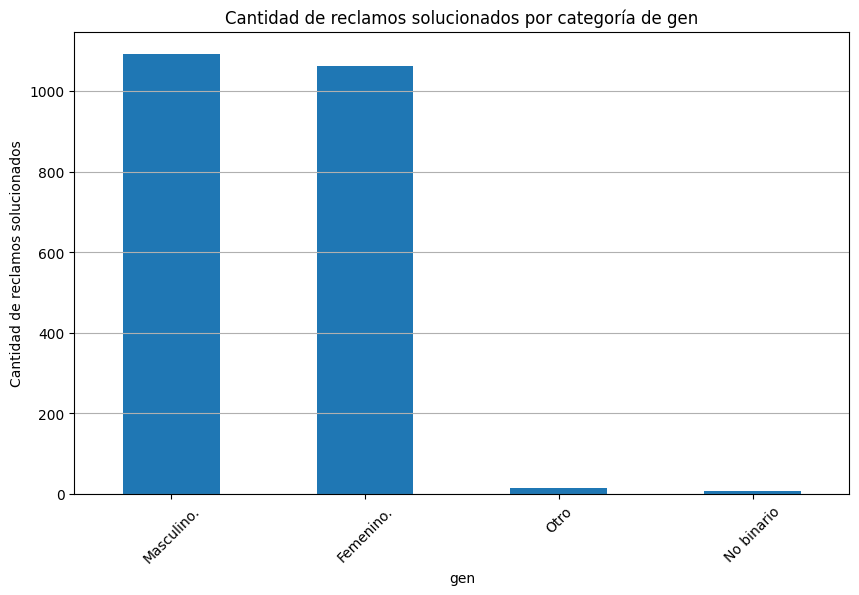

region


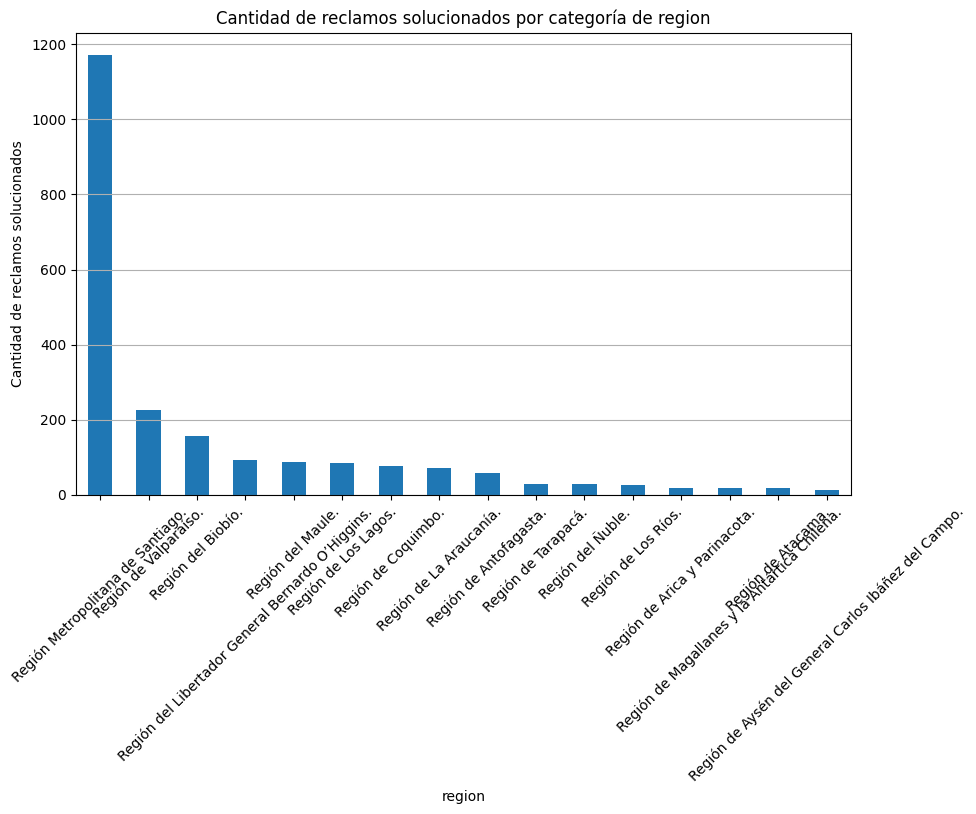

educ


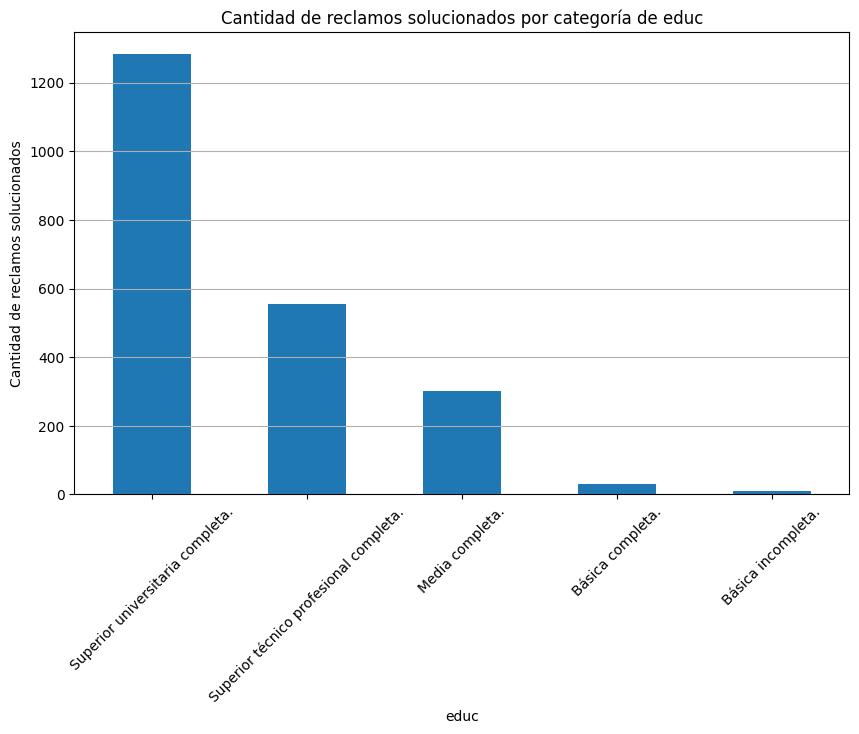

edad


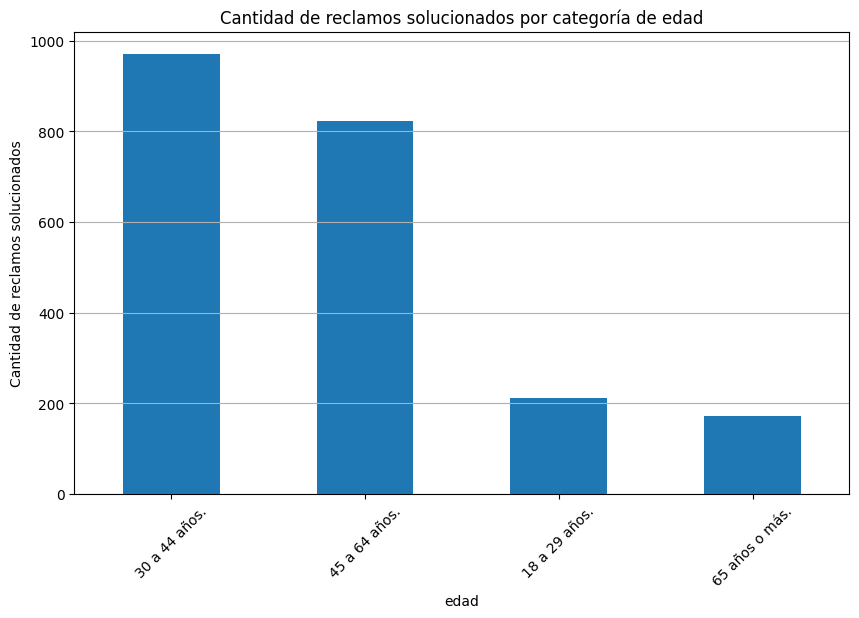

ocup


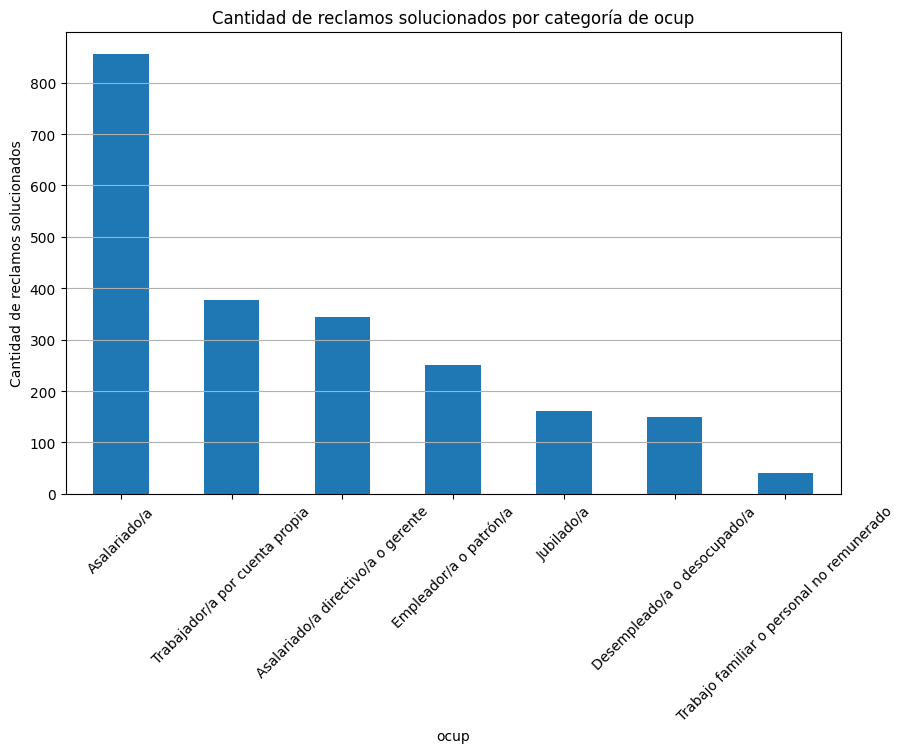

ingreso


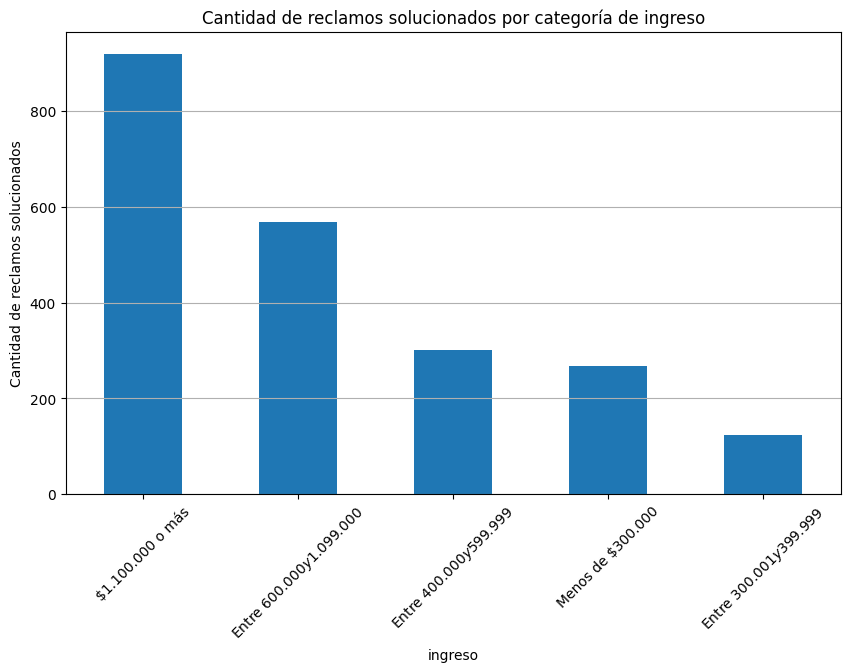

sitdisc


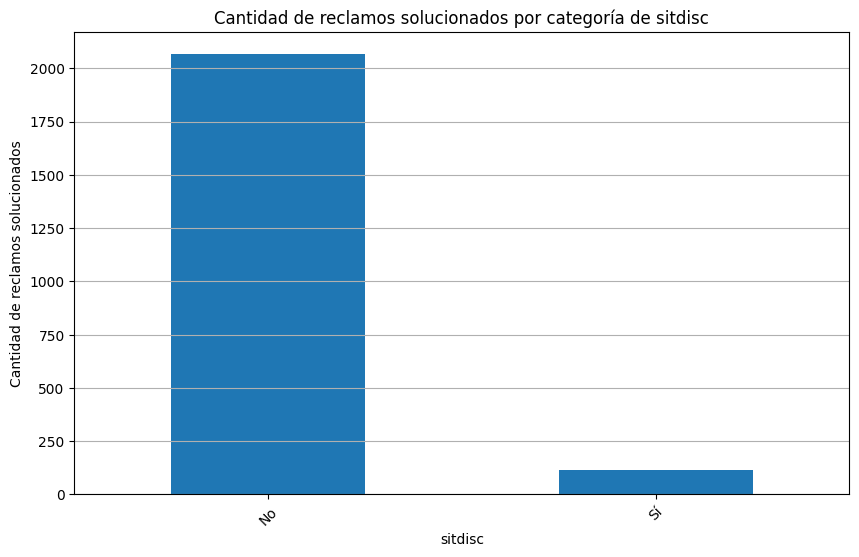

indg


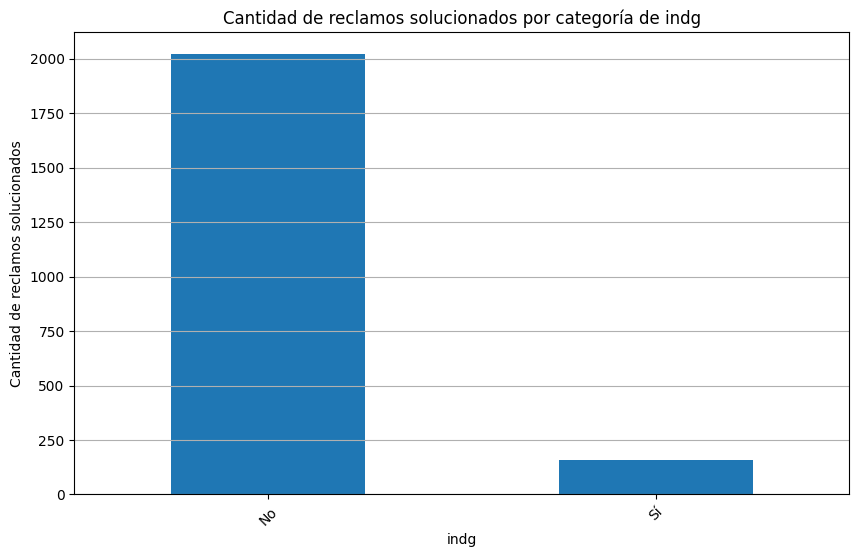

In [27]:
import matplotlib.pyplot as plt

def grafico_reclamos_solucionados(dff, columna):
    # Verificar si la columna está en el DataFrame
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no se encuentra en el DataFrame.")

    # Verificar si la columna es una de las permitidas
    columnas_permitidas = ['gen', 'region', 'educ', 'edad', 'ocup', 'ingreso', 'sitdisc', 'indg']
    if columna not in columnas_permitidas:
        raise ValueError(f"La columna '{columna}' no es una columna permitida.")

    # Filtrar los datos donde el estado del reclamo es "soluciono su reclamo"
    df_filtrado = dff[dff['p2'] == 'No solucionó su Reclamo.']

    # Contar la cantidad de reclamos solucionados por cada categoría en la columna especificada
    reclamos_por_categoria = df_filtrado[columna].value_counts()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    reclamos_por_categoria.plot(kind='bar')
    plt.title(f'Cantidad de reclamos solucionados por categoría de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de reclamos solucionados')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

for nombre in ['gen', 'region', 'educ', 'edad', 'ocup', 'ingreso', 'sitdisc', 'indg']:
    print(nombre)
    grafico_reclamos_solucionados(df, nombre)

# Ejercicio 6
Para el mes que se genera la mayor candidad de reclamos, independiente si hay o no solucion, muestr en forma ordenada para cada genero de mayor a menor cantidad de reclamos realizada por clientes con nivel de estudios "Superior universitaria completa." y compare esta cantidad con aquellos con vivel de estudios "Básica completa.", concluya a que puede asociar este reesultado

In [ ]:
# Determinar el mes con la mayor cantidad de reclamos
mes_mas_reclamos = df['mes'].value_counts().idxmax()

# Filtrar los datos para el mes con más reclamos
df_mes = df[df['mes'] == mes_mas_reclamos]

# Filtrar por nivel educativo y contar por género
reclamos_superior = df_mes[df_mes['educ'] == 'Superior universitaria completa.']['gen'].value_counts()
reclamos_basica = df_mes[df_mes['educ'] == 'Básica completa.']['gen'].value_counts()

# Mostrar los resultados ordenados
print(f"Reclamos en el mes con más reclamos ({mes_mas_reclamos}):")

print("\nSuperior universitaria completa:")
print(reclamos_superior.sort_values(ascending=False))

print("\nBásica completa:")
print(reclamos_basica.sort_values(ascending=False))

# Comparación entre los dos niveles educativos
comparacion = pd.DataFrame({
    'Superior universitaria completa': reclamos_superior,
    'Básica completa': reclamos_basica
}).fillna(0)

print("\nComparación de reclamos entre niveles educativos:")
print(comparacion)

Reclamos en el mes con más reclamos (January):

Superior universitaria completa:
gen
Masculino.    186
Femenino.     165
Otro            4
No binario      2
Name: count, dtype: int64

Básica completa:
gen
Femenino.     4
Masculino.    3
Name: count, dtype: int64

Comparación de reclamos entre niveles educativos:
            Superior universitaria completa  Básica completa
gen                                                         
Femenino.                               165              4.0
Masculino.                              186              3.0
No binario                                2              0.0
Otro                                      4              0.0
